# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | kingston
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | kirakira
Processing Record 13 of Set 1 | potchefstroom
Processing Record 14 of Set 1 | azadshahr
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | urangan
Processing Record 17 of Set 1 | kawm umbu
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | rio gallegos
Processing Record 21 of Set 1 | labrador city
Processing Record 22 of Set 1 | taiohae
City n

Processing Record 39 of Set 4 | guelendeng
Processing Record 40 of Set 4 | mahbubnagar
Processing Record 41 of Set 4 | meadow lakes
Processing Record 42 of Set 4 | bamboo flat
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | kapa'a
Processing Record 45 of Set 4 | pontes e lacerda
Processing Record 46 of Set 4 | lhasa
Processing Record 47 of Set 4 | kudahuvadhoo
Processing Record 48 of Set 4 | alaghsas
Processing Record 49 of Set 4 | bel ombre
Processing Record 0 of Set 5 | hayma'
City not found. Skipping...
Processing Record 1 of Set 5 | virginia
Processing Record 2 of Set 5 | along
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | nizhniy kuranakh
Processing Record 5 of Set 5 | quellon
Processing Record 6 of Set 5 | kulia village
City not found. Skipping...
Processing Record 7 of Set 5 | qianzhou
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | nogliki
Processing Record 10 of Set 5 | keflavik
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | aoulef
Processing Record 32 of Set 8 | dolores
Processing Record 33 of Set 8 | akrehamn
Processing Record 34 of Set 8 | bukama
Processing Record 35 of Set 8 | acarau
Processing Record 36 of Set 8 | mbandaka
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | gobernador virasora
Processing Record 39 of Set 8 | qal'at bishah
City not found. Skipping...
Processing Record 40 of Set 8 | ahiri
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | fort bragg
Processing Record 43 of Set 8 | sherwood
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | dzhangala
Processing Record 46 of Set 8 | marataizes
Processing Record 47 of Set 8 | lamitan city
Processing Record 48 of Set 8 | chul'man
Processing Record 49 of Set 8 | robore
Processing Record 0 of Set 9 | nadym
Processing Record 1 of Set 9 | magistral'nyy
Processing Record 2 of Set 9 | bredy
Processing Record 3 of Set 9 | kostomuksha
Processin

Processing Record 18 of Set 12 | siracusa
Processing Record 19 of Set 12 | kinchil
Processing Record 20 of Set 12 | dem'yanovo
Processing Record 21 of Set 12 | midvagur
Processing Record 22 of Set 12 | kabare
Processing Record 23 of Set 12 | ajdabiya
Processing Record 24 of Set 12 | puerto aysen
Processing Record 25 of Set 12 | pecan plantation
Processing Record 26 of Set 12 | belen
Processing Record 27 of Set 12 | darwin
Processing Record 28 of Set 12 | park forest village
Processing Record 29 of Set 12 | taltal
Processing Record 30 of Set 12 | solleftea
Processing Record 31 of Set 12 | conception bay south
Processing Record 32 of Set 12 | malango
Processing Record 33 of Set 12 | mar del plata
Processing Record 34 of Set 12 | behbahan
Processing Record 35 of Set 12 | la'ie
Processing Record 36 of Set 12 | kayangel
Processing Record 37 of Set 12 | xucheng
Processing Record 38 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 39 of Set 12 | mejit
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,27.01,79,62,1.35,ID,1707072965
1,bredasdorp,-34.5322,20.0403,22.87,82,25,2.30,ZA,1707072967
2,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968
3,puerto natales,-51.7236,-72.4875,25.25,38,75,15.95,CL,1707072968
4,stanley,54.8680,-1.6985,12.38,83,75,10.80,GB,1707072968


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,27.01,79,62,1.35,ID,1707072965
1,bredasdorp,-34.5322,20.0403,22.87,82,25,2.30,ZA,1707072967
2,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968
3,puerto natales,-51.7236,-72.4875,25.25,38,75,15.95,CL,1707072968
4,stanley,54.8680,-1.6985,12.38,83,75,10.80,GB,1707072968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

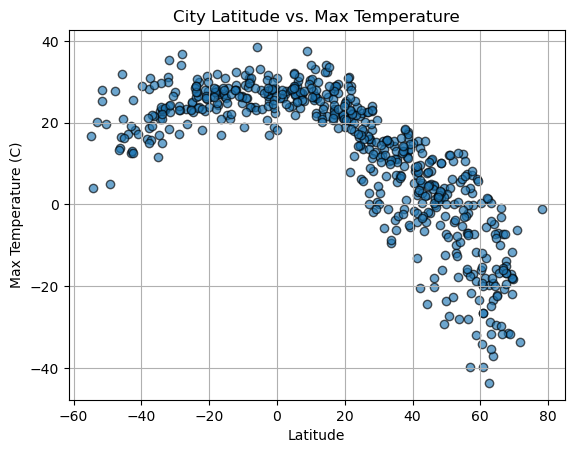

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.65)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

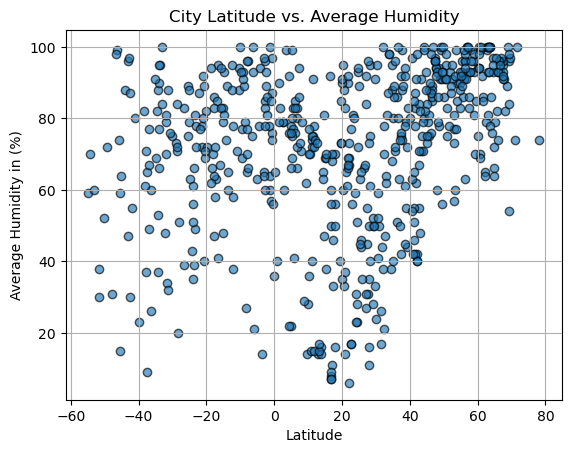

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Average Humidity")
plt.xlabel("Latitude")
plt.ylabel("Average Humidity in (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

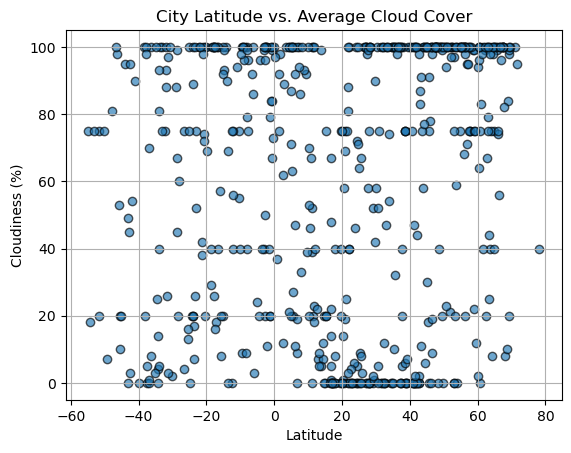

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Average Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

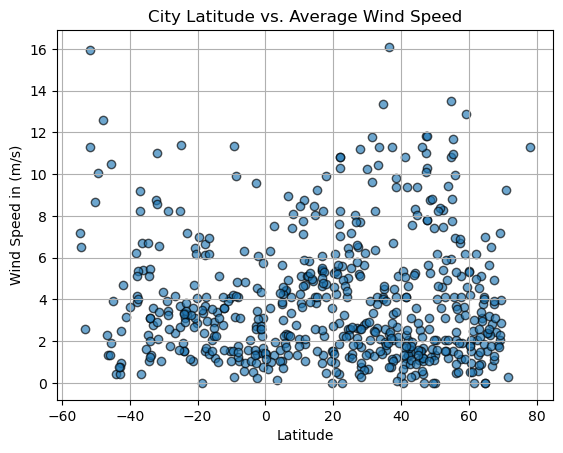

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.65)

# Incorporate the other graph properties
plt.title("City Latitude vs. Average Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


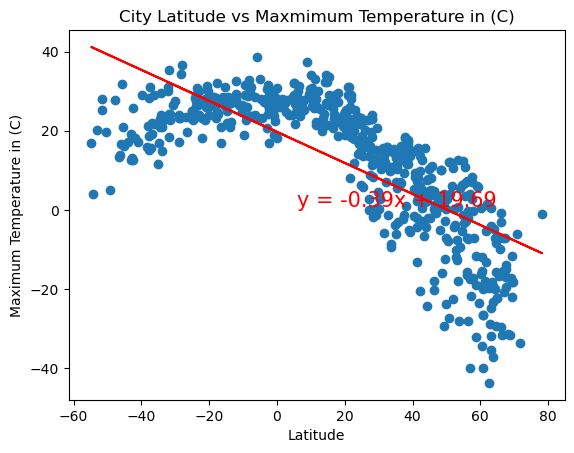

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Maxmimum Temperature in (C)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature in (C)')
plt.show()

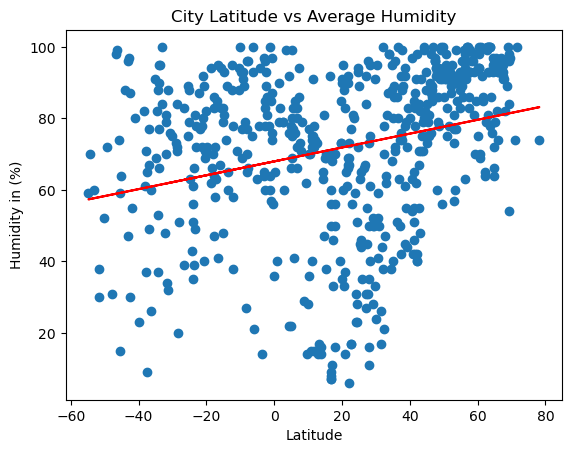

In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity in (%)')
plt.show()

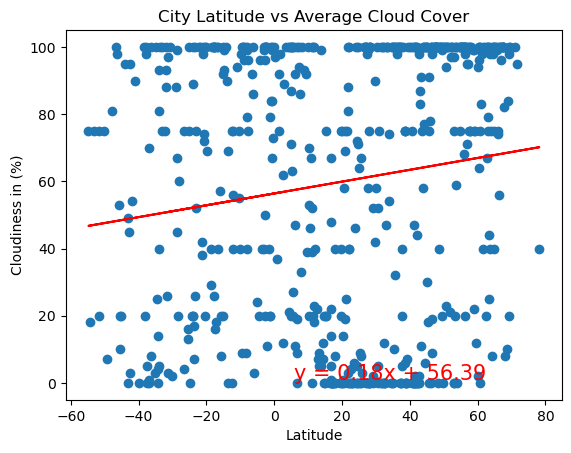

In [14]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Cloud Cover')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness in (%)')
plt.show()

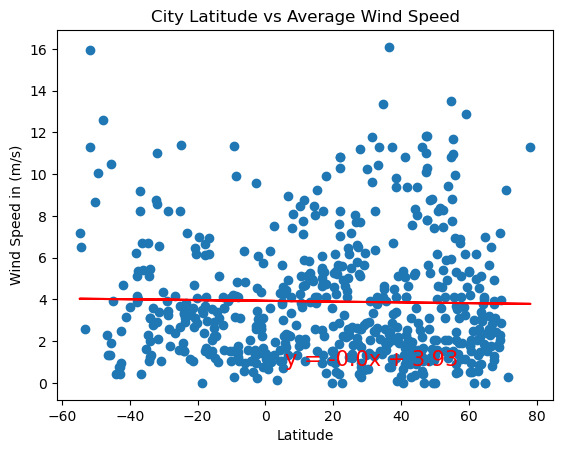

In [15]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in (m/s)')
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,27.01,79,62,1.35,ID,1707072965
4,stanley,54.8680,-1.6985,12.38,83,75,10.80,GB,1707072968
6,jamestown,42.0970,-79.2353,9.73,42,0,2.06,US,1707072969
8,fortuna,40.5982,-124.1573,8.19,97,75,0.00,US,1707072969
9,kingston,17.9970,-76.7936,29.53,70,40,4.12,JM,1707072969


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,22.87,82,25,2.30,ZA,1707072967
2,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968
3,puerto natales,-51.7236,-72.4875,25.25,38,75,15.95,CL,1707072968
5,grytviken,-54.2811,-36.5092,4.04,70,18,6.50,GS,1707072968
7,saint-philippe,-21.3585,55.7679,22.77,72,38,3.60,RE,1707072969


###  Temperature vs. Latitude Linear Regression Plot

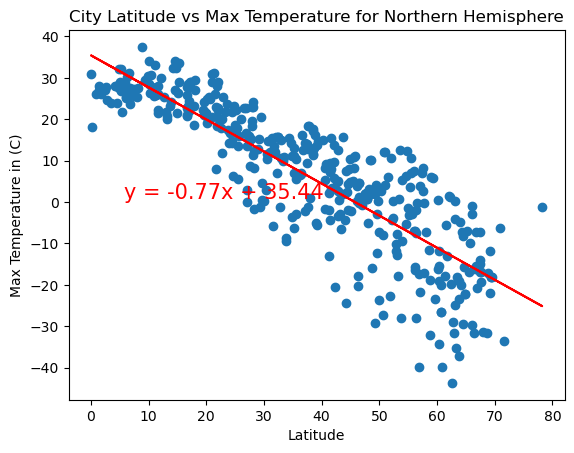

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature for Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in (C)')
plt.show()

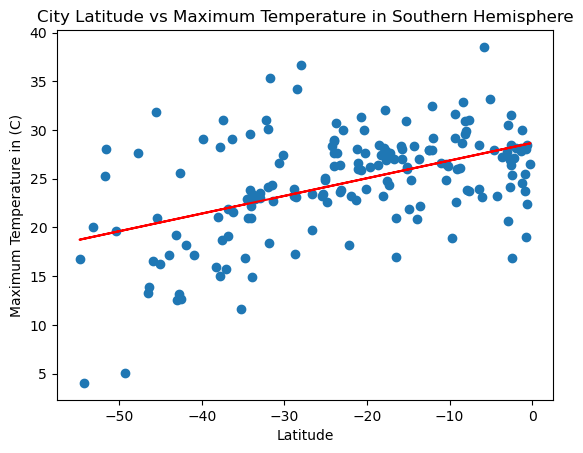

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Maximum Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature in (C)')
plt.show()

**Discussion about the linear relationship:** There exists a stark negative relationship between City latitude and Maximum temperature in the Northern hemisphere. On the other hand, there exists a positive relationship between City latitude and maximum temperature in the Southern hemisphere, albeit, the relationship is not as strong as the one found in the North. 

### Humidity vs. Latitude Linear Regression Plot

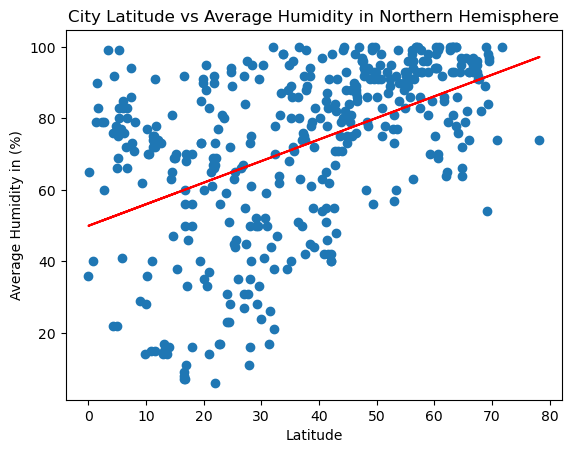

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Average Humidity in (%)')
plt.show()

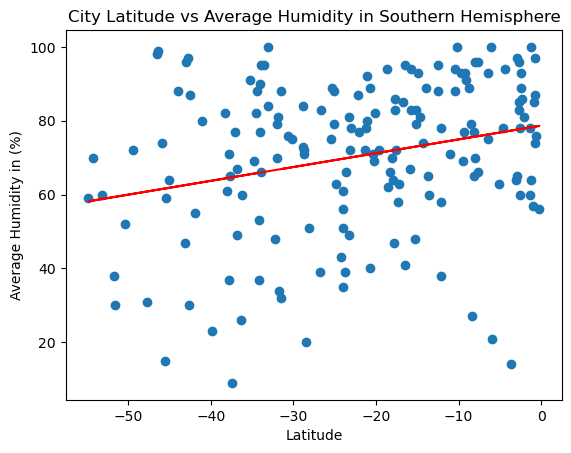

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Average Humidity in (%)')
plt.show()

**Discussion about the linear relationship:** There is a weaker but existent positive relationship between City latitude and average humidity in the Northern Hemisphere. On the other hand, there is almost no relationship between city latitude and average humidity in the Southern hemisphere, albeit, there exist a very slight positive relationship but the results are mostly random for the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

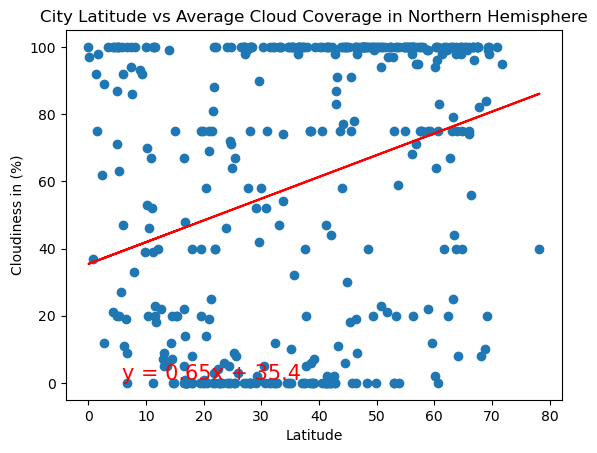

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Cloud Coverage in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness in (%)')
plt.show()

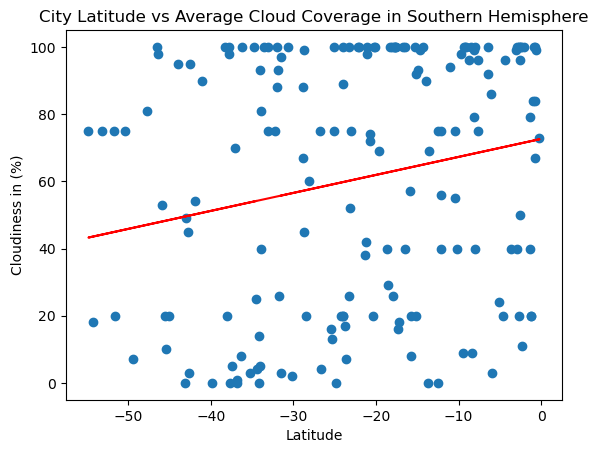

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Cloud Coverage in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness in (%)')
plt.show()

**Discussion about the linear relationship:** There exists a similar stronger positive relationship between City latitude and average cloud coverage (in %) both in the Northern and Southern Hemisphere. The results are still somewhat random for both hemispheres but given the slope of each regression line, a strong positive relationship exists for the Northern Hemisphere while the Southern Hemisphere is a bit more random.

### Wind Speed vs. Latitude Linear Regression Plot

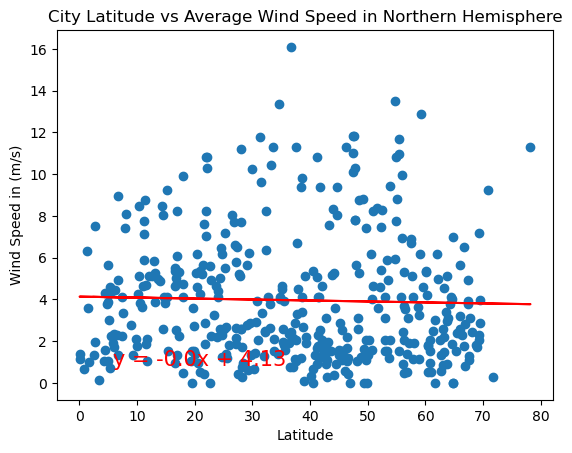

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Wind Speed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in (m/s)')
plt.show()

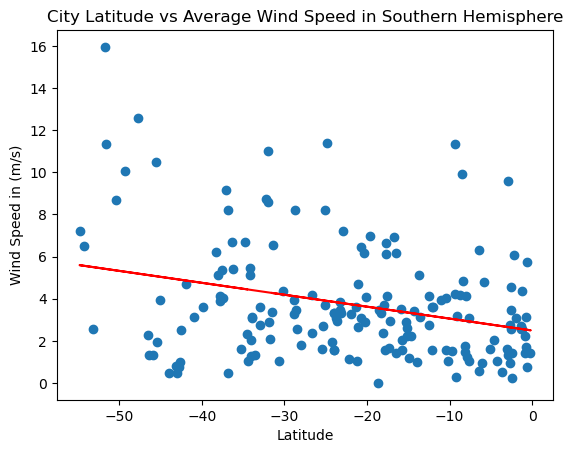

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('City Latitude vs Average Wind Speed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in (m/s)')
plt.show()

**Discussion about the linear relationship:** There exists no relationship between city latitude and average wind speed in (m/s) in the Northern Hemisphere. In the Southern hemisphere, there exists an incredibly weak negative relationship between city latitude and average wind speed in (m/s), however this relationship is so weak it is almost negligable. 